H [[1 2 3 4 5]
 [5 4 3 2 1]
 [5 3 8 9 5]
 [3 4 3 2 3]]
xtrue [1 0 0 0 1]
ztrue [ 6  6 10  6]


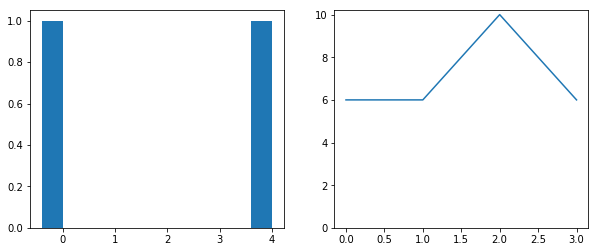

In [26]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


H = np.array([1,2,3,4,5,
              5,4,3,2,1,
              5,3,8,9,5,
              3,4,3,2,3])
m, n = 4, 5
H = H.reshape(m, n)
print 'H', H

xtrue = np.array([1,0,0,0,1])
print 'xtrue', xtrue

z = np.dot(H, xtrue)
print 'ztrue', z

def plot(x=None):
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    ax[0].bar(np.arange(n)-0.2, xtrue, width=0.4)
    ax[1].plot(np.arange(m), np.dot(H, xtrue))
    if x is not None:
        ax[0].bar(np.arange(n)+0.2, x, width=0.4)
        ax[1].plot(np.arange(m), np.dot(H, x))
    ax[1].set_ylim(0,None)
    
plot()

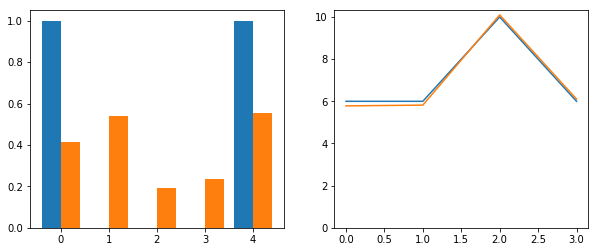

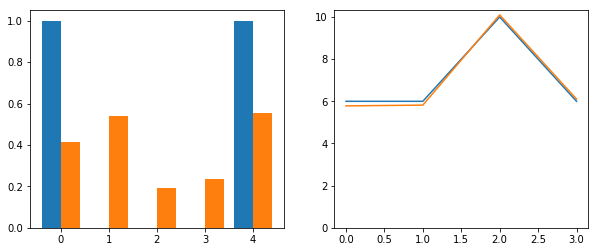

In [27]:
from green_function import GreenFunction

param0 = [0.1, 0.1, 0.1, 0.1, 0.1]
eparam = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

# default simulation
state0 = np.dot(H, param0)

# define
g = GreenFunction(param0=param0,
                  state0=state0,
                  obs=z,
                  obs_error=0.1,
                  back_error=eparam)

# additional simulation
params = g.get_ini_params()
for p in params:
    state = np.dot(H, p)
    g.append(p, state)

# 1st optimization by least square
param_opt = g.solve_ridge()
plot(param_opt)

# update simulation for next loop
state = np.dot(H, param_opt)
g.update(param_opt, state)

# 2nd optimization
param_opt = g.solve_ridge()
plot(param_opt)

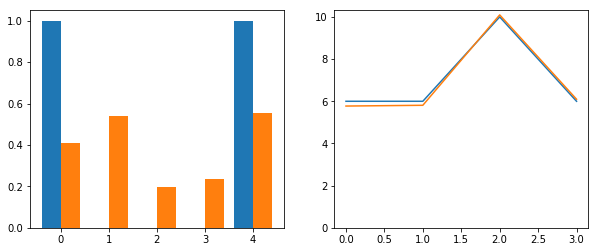

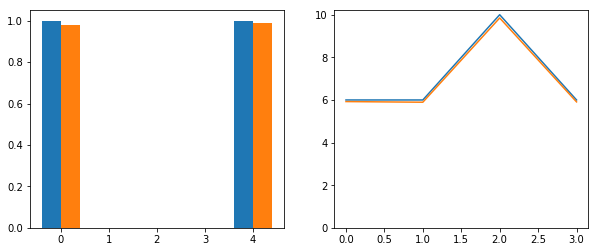

In [28]:
from green_function import GreenFunctionSparse

param0 = [0., 0., 0., 0., 0.]
eparam = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

# default simulation
state0 = np.dot(H, param0)

# define
g = GreenFunctionSparse(param0=param0,
                  state0=state0,
                  obs=z,
                  obs_error=0.1,
                  back_error=eparam)

# additional simulation
params = g.get_ini_params()
for p in params:
    state = np.dot(H, p)
    g.append(p, state)

# 1st optimization by least square
param_opt = g.solve_ridge()
plot(param_opt)

# update simulation for next loop
state = np.dot(H, param_opt)
g.update(param_opt, state)

# 2nd optimization
param_opt = g.solve_sparse_ADMM(lam=1., mu=1.)
plot(param_opt)